## Guided Local Search with Random Updates (GLS)

In [1]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from alg import *
from utils import *

In [2]:
num_trials = 5
resources = [5, 10, 15, 20]

def opt_bound(R, p):
    _, m, r, = lpt(R, p)
    return m / r

def lpt_value(R, p):
    _, m, _, = lpt(R, p)
    return m

def makespan(R, p, beta=0.5, max_iters=1000, hc_iters=10):
    _, m = gls(R=R, p=p, beta=beta, max_iters=max_iters, hc_iters=hc_iters)
    return m

## Comparison on sub-optimal instance

### Varying beta
Beta parameter specifies the degree to which novelty figures in final quality computation. More specificaly, it is used to define the so called *adjusted cost* as follows:
```
adj_cost(s) = cost(s) + beta * sum_i { penalty[component_i] if component_i in s else 0 }
```

In [3]:
def eval_subopt_lpt(R):
    _, m, r, = lpt(R, p=suboptimal_instance(R))
    return m / r, m

lpt_df = pd.DataFrame(data=(eval_subopt_lpt(R) for R in resources), index=resources, columns=['opt_bound', 'lpt'])

In [4]:
def eval_subopt_gls(**kwargs):
    for R in resources:
        yield sum(makespan(R, suboptimal_instance(R), **kwargs) for _ in range(num_trials)) / num_trials

In [5]:
betas = [0.25, 0.5, 0.75]

gls_df = pd.DataFrame({f'gls (beta={beta})': eval_subopt_gls(beta=beta) for beta in betas}, index=resources)

pd.concat([lpt_df, gls_df], axis=1)

,opt_bound,lpt,gls (beta=0.25),gls (beta=0.5),gls (beta=0.75)
5,13.571429,19.0,26.0,25.6,28.4
10,28.536585,39.0,66.2,71.0,54.8
15,43.524590,59.0,89.6,98.8,101.4
20,58.518519,79.0,151.8,148.8,131.4


<AxesSubplot:title={'center':'Quality relative to LPT for sub-optimal instances'}, ylabel='#resources (R)'>

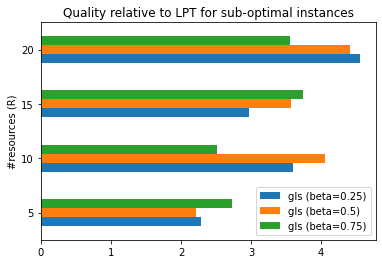

In [6]:
df = gls_df.sub(lpt_df.opt_bound, axis=0).div(lpt_df.lpt - lpt_df.opt_bound, axis=0)
df.plot.barh(ylabel='norm. quality(GLS)/quality(LPT)', xlabel='#resources (R)', title='Quality relative to LPT for sub-optimal instances')

### Exploitation effect of Hill Climbing

In [7]:
hc_iters_choices = [0, 10, 100]

gls_df = pd.DataFrame({f'gls (HC-{hc_iters})': eval_subopt_gls(hc_iters=hc_iters) for hc_iters in hc_iters_choices}, index=resources)

pd.concat([lpt_df, gls_df], axis=1)

,opt_bound,lpt,gls (HC-0),gls (HC-10),gls (HC-100)
5,13.571429,19.0,32.4,29.2,25.4
10,28.536585,39.0,59.4,64.2,63.0
15,43.524590,59.0,102.0,95.0,99.4
20,58.518519,79.0,134.0,123.6,140.8


<AxesSubplot:title={'center':'Quality relative to LPT for sub-optimal instances'}, ylabel='#resources (R)'>

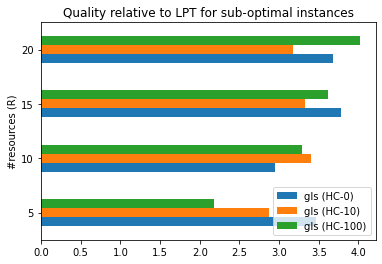

In [8]:
df = gls_df.sub(lpt_df.opt_bound, axis=0).div(lpt_df.lpt - lpt_df.opt_bound, axis=0)
df.plot.barh(ylabel='norm. quality(GLS)/quality(LPT)', xlabel='#resources (R)', title='Quality relative to LPT for sub-optimal instances')

### Effect of increasing max. number of iterations

In [9]:
max_iters_choices = [1_000, 2_000, 5_000]
hc_iters=100

gls_df = pd.DataFrame(
    {
        f'gls ({max_iters}, HC-{hc_iters})': eval_subopt_gls(max_iters=max_iters, hc_iters=hc_iters) for max_iters in max_iters_choices
    },
    index=resources,
)

df = pd.concat([lpt_df, gls_df], axis=1)
df

,opt_bound,lpt,"gls (1000, HC-100)","gls (2000, HC-100)","gls (5000, HC-100)"
5,13.571429,19.0,26.4,28.6,27.8
10,28.536585,39.0,61.0,68.2,66.2
15,43.524590,59.0,88.0,94.0,90.2
20,58.518519,79.0,166.4,141.8,126.6


<AxesSubplot:xlabel='#resources (R)', ylabel='min. makespan (mean for GLS)'>

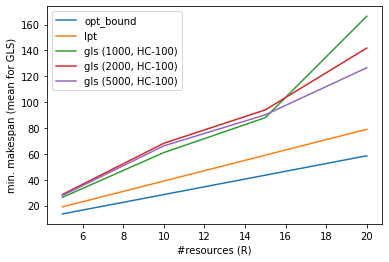

In [10]:
df.plot.line(xlabel='#resources (R)', ylabel='min. makespan (mean for GLS)')